In [70]:
import re

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def extract_data(filename):
    with open(filename) as infile:
        content = infile.read()
    
    transcription = re.findall(r'Transcription\s+(.+)', content)
    whisper = re.findall(r'Whisper:\s+(.+)', content)
    mistral = re.findall(r'Mistral:\s+(.+)', content)
    time = re.findall(r'time:\s+(.+)', content)
    
    plan = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1] # umulig å få til
    
    return {
        'transcription': list(map(int, transcription)),
        'whisper': list(map(str, whisper)),
        'mistral': list(map(str, mistral)),
        'time': list(map(float, time)),
        'plan': list(map(int, plan))
    }

In [73]:
data = extract_data('results.txt')
df = pd.DataFrame(data)
df.loc[25, 'mistral'] = ''

test_1 = df.loc[df['transcription'] == 1]
test_2 = df.loc[df['transcription'] == 2]
test_3 = df.loc[df['transcription'] == 3]
test_4 = df.loc[df['transcription'] == 4]

test_1_mean = test_1['time'].mean()
test_2_mean = test_2['time'].mean()
test_3_mean = test_3['time'].mean()
test_4_mean = test_4['time'].mean()

mean_times = [test_1_mean, test_2_mean, test_3_mean, test_4_mean]

success_rate = df['plan'].mean()
print(f'Success rate: {success_rate}')

Success rate: 0.95


[]

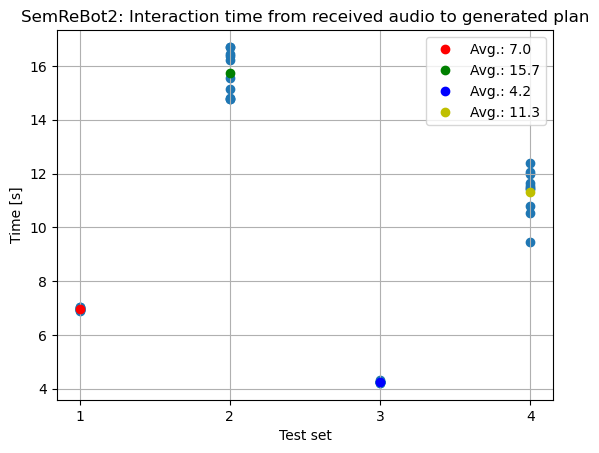

In [87]:
plt.scatter(df['transcription'], df['time'])

for i in range(len(mean_times)):
    if i == 0:
        colour = 'ro'
    elif i == 1:
        colour = 'go'
    elif i == 2:
        colour = 'bo'
    else:
        colour = 'yo'

    plt.plot(i+1, mean_times[i], colour, label=f'Avg.: {round(mean_times[i], 1)}')

plt.xlabel('Test set')
plt.ylabel('Time [s]')
plt.title('SemReBot2: Interaction time from received audio to generated plan')
plt.xticks([1, 2, 3, 4])
plt.grid()
plt.legend()
plt.plot()